In [1]:
import numpy as np
from matplotlib import pyplot as plt
from py import opt, read, hypergraph
from py.utils import *

# plt.style.use('dark_background')

In [2]:
w = np.loadtxt('throughput/contact-high-school/w.txt')
x = np.loadtxt('throughput/contact-high-school/x.txt')
w2 = np.loadtxt('throughput/contact-high-school/w2.txt')

In [3]:
d = np.round(w.sum(axis = 0).astype(int))
b = x.sum(axis = 0)
n = len(d)
m = np.round(w.sum()/2).astype(int)
b_ = opt.compute_b(d)

round 0, current error = 13455.9104
round 1, current error = 49.6615
round 2, current error = 125.4434
round 3, current error = 2.3032
round 4, current error = 0.1378
round 5, current error = 0.0135


In [4]:
n, m

(268, 10026)

/home/phil/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/phil/.local/lib/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


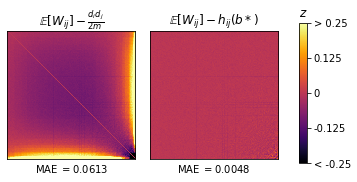

In [7]:
vmin = -.25
vmax = .25
cmap = 'inferno'

sig = np.sqrt(w2 - w**2)
sig

fig = plt.figure(figsize = (5, 2.5))
ax1 = fig.add_subplot(121)

CL = np.outer(d, d)/d.sum()
np.fill_diagonal(CL, 0)

err = (CL - w)
v = np.mean(np.abs(err))

to_plot = degree_sort(err/sig, d)
to_plot[np.isinf(to_plot)] = 0
to_plot[np.isnan(to_plot)] = 0
im = ax1.imshow(to_plot, cmap = cmap, vmin = vmin, vmax = vmax)

description = r"$\mathbb{E}[W_{ij}] - \frac{d_id_j}{2m}$"
err = r"MAE $ = $" + "{:05.4F}".format(v)
ax1.set(title = description,
        xlabel = err)

ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    right=False,
    left=False,
    labelbottom=False,
    labelleft=False,
    length = 0)

ax3 = fig.add_subplot(122)


W_ = W_from_b(b_)
err = (W_ - w) 
np.fill_diagonal(err, 0)
err[np.isinf(err)] = 0
v = np.nanmean(np.abs(err))

to_plot = degree_sort(err/sig, d)
to_plot[np.isinf(to_plot)] = 0
to_plot[np.isnan(to_plot)] = 0
im = ax3.imshow(to_plot, cmap = cmap, vmin = vmin, vmax = vmax)

# im = ax3.imshow(degree_sort(err), cmap = cmap, vmin = vmin, vmax = vmax)


description = r"$\mathbb{E}[W_{ij}] - h_{ij}(b*)$"
err = r"MAE $ = $" + "{:05.4F}".format(v)

ax3.set(title = description,
        xlabel = err)

ax3.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    right=False,
    left=False,
    labelbottom=False,
    labelleft=False,
    length = 0)

plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.78])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[vmin, vmin/2, 0, vmax/2, vmax])

cbar.ax.set_yticklabels(['< ' + str(vmin), str(vmin/2), '0' , str(vmax/2), '> ' + str(vmax)])  # vertically oriented colorbar
cbar_ax.set(title = r'$z$')

plt.savefig('../../Downloads/error_matrices.png', dpi=300)

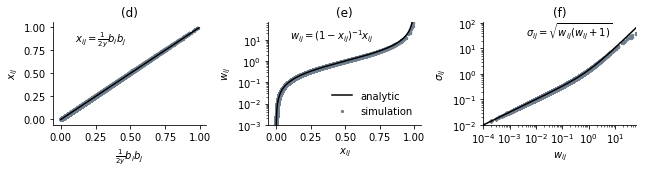

In [8]:
fig = plt.figure(figsize = (9, 2.5))

linewidth = 1.5
alpha = 1



# first plot

ax1 = fig.add_subplot(131)
CL_ = X_from_b(b_)
ax1.scatter(CL_.ravel(),
            x.ravel(), 
            s = 5,
            label = 'simulation', 
            color = 'slategrey', 
            alpha = alpha)
ax1.plot([0, x.max()], [0, x.max()], color = 'black', label = 'analytic', linewidth = linewidth)

ax1.set(xlabel = r'$\frac{1}{2y}b_ib_j$', 
        ylabel = r'$x_{ij}$', 
        title = '(d)')


# ax1.text(.5, .25, r'$x_{ij} = \frac{b_ib_j}{2y}$')
ax1.text(.1, .85, r'$x_{ij} = \frac{1}{2y}b_ib_j$')

# second plot: w_{ij} vs. x_{ij}

ax2 = fig.add_subplot(132)
ax2.scatter(x.ravel(), 
           w.ravel(), 
           s = 5, 
           label = 'simulation', 
           color = 'slategrey', 
           alpha = alpha)
ax2.semilogy()


X = np.linspace(w.min(), w.max(), 100000)
Y = X/(1+X)
ax2.plot(Y, X, color = 'black', label = 'analytic', linewidth = linewidth)

ax2.set(ylim = (w.min() + .001, w.max()),
       xlabel = r'$x_{ij}$',
       ylabel = r'$w_{ij}$', 
        title = '(e)')


# ax2.text(.35, .05, r'$w_{ij} = \frac{x_{ij}}{1-x_{ij}}$')
ax2.text(.1, 10, r'$w_{ij} = (1-x_{ij})^{-1}x_{ij}$')

# third plot: variance
ax3 = fig.add_subplot(133)
sig = np.sqrt(w2.ravel() - (w**2).ravel())
ax3.scatter(w.ravel(), 
           sig, 
           s = 5, 
           label = 'simulation', 
           color = 'slategrey', 
           alpha = alpha)
ax3.loglog()

X = np.linspace(w.min(), w.max(), 1000000)

Y = np.sqrt(X*(X+1))

ax3.plot(np.sort(X),np.sort(Y), label = 'analytic', color = 'black', linewidth = linewidth)

ax3.set(xlim = (w[w>0].min(), w.max()),
       ylim = (sig[sig>0].min(), None),
        xlabel = r'$w_{ij}$',
       ylabel = r'$\sigma_{ij}$', 
       title = '(f)')

ax3.text(.004, 30, r'$\sigma_{ij} = \sqrt{w_{ij}(w_{ij} + 1)}$')

# Fourth plot: learned parameters
# ax4 = fig.add_subplot(141)
# ax4.scatter(d, b, color = 'slategrey', label = 'simulation', s = 15)
# ax4.plot(np.sort(d), np.sort(b_), color = 'black', label = 'learned', linewidth = linewidth)

# ax4.set(xlabel = r'$d_i$', 
#         ylabel = r'$b_i$', 
#         title = '(a)')

for ax in [ax1, ax2, ax3]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

ax2.legend(loc = 'lower right', frameon=False)

plt.tight_layout()
plt.savefig('../../Downloads/validation.png', dpi=300)

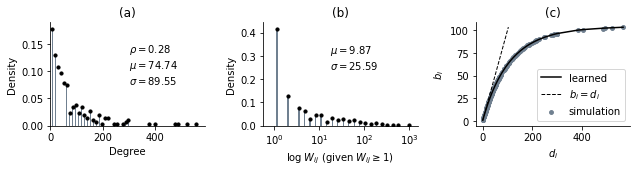

In [9]:
X, Y = np.histogram(d, bins = 50)
X = X/X.sum()
Y = Y[1:] - (Y[1] - Y[0])/2

Y = Y[X>0]
X = X[X > 0]

fig = plt.figure(figsize = (9, 2.5))
ax1 = fig.add_subplot(131)


ax1.bar(Y, X, color = 'slategrey', width = 3)
ax1.scatter(Y, X, color = 'black', zorder=10, s = 10)
ax1.set(title = '(a)', 
       ylim = (0, None),
       xlim = (0, None),
       xlabel = "Degree", 
       ylabel = "Density")


# distribution of interaction weights
ax3 = fig.add_subplot(132)

data = 'contact-high-school'
path = data + '/' + data + '-'

t_min = 1386330122

C = read.read_data(data, t_min = t_min)
C = hypergraph.hypergraph(C)
G = hypergraph.projected_graph(C, as_hyper = True)
W = adjacency_matrix(G)
to_hist = np.log(W[W > 0].ravel())
X, Y = np.histogram(to_hist, bins = 25)
X = X/X.sum()
Y = Y[1:] - (Y[1] - Y[0])/2

Y = Y[X>0]
X = X[X > 0]

ax3.bar(Y, X, color = 'slategrey', width = .05)
ax3.scatter(Y, X, color = 'black', zorder=10, s = 10)
ax3.set(title = '(b)', 
       ylim = (0, None),
       xlim = (-.5, None),
       xlabel = r"$\log \; W_{ij}$ (given $W_{ij} \geq 1$)", 
       ylabel = "Density")

W_ = W[W>0]
mu = W_.mean()
sigma = np.sqrt(np.var(W_))
ax3.text(2.5, .25, 
         r'$\mu = $' + str(round(mu, 2)) + '\n' + r'$\sigma = $' + str(round(sigma, 2)))

# ax3.semilogy()
ax3.set_xticks(np.arange(0, 7, 2))
ax3.set_xticklabels([r"$10^0$", r"$10^1$", r"$10^2$", r"$10^3$"])


# first plot: basic descriptives of degree sequence
mu = d.mean()
sigma = np.sqrt(((d**2).mean() - d.mean()**2))
density = d.sum() / (n*(n-1))

ax1.text(300, .08, 
        r'$\rho = $' + str(round(density, 2)) + '\n' +  r'$\mu = $' + str(round(mu, 2)) + '\n' + r'$\sigma = $' + str(round(sigma,2)))

ax2 = fig.add_subplot(133)


ax2.scatter(d, b, color = 'slategrey', label = 'simulation', s = 15)
ax2.plot(np.sort(d), np.sort(b_), color = 'black', label = 'learned', linewidth = linewidth)
ax2.plot([0, b.max()], [0, b.max()], linestyle = 'dashed', color = 'black', label = r'$b_i = d_i$', linewidth = 1)


ax2.set(xlabel = r'$d_i$', 
        ylabel = r'$b_i$', 
        title = '(c)')

for ax in ax1, ax2, ax3:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
ax2.legend(loc = 'lower right')

plt.tight_layout()

plt.savefig('../../Downloads/degree_distribution.png', dpi=300)